# Практична 6
Лесняк А, 559мн

Отримати та візуалізувати embeddings набору даних Fashion_MNIST.

Дослідити порівняльний аналіз https://umap-learn.readthedocs.io/en/latest/performance.html 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from tensorflow.keras.datasets import fashion_mnist
import time

from sklearn.utils import resample

In [39]:
(train_features, train_labels), (test_features, test_labels) = fashion_mnist.load_data()

train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

In [40]:
# PCA
pca = PCA(n_components = 2)
features_pca = pca.fit_transform(train_features_flat)

# t-SNE
tsne = TSNE(n_components = 2, random_state = 42)
features_tsne = tsne.fit_transform(train_features_flat)

# UMAP
umap = umap.UMAP(n_components = 2, random_state = 42)
features_umap = umap.fit_transform(train_features_flat)

c:\Users\Todmount\miniconda3\envs\ai_cv_uni\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


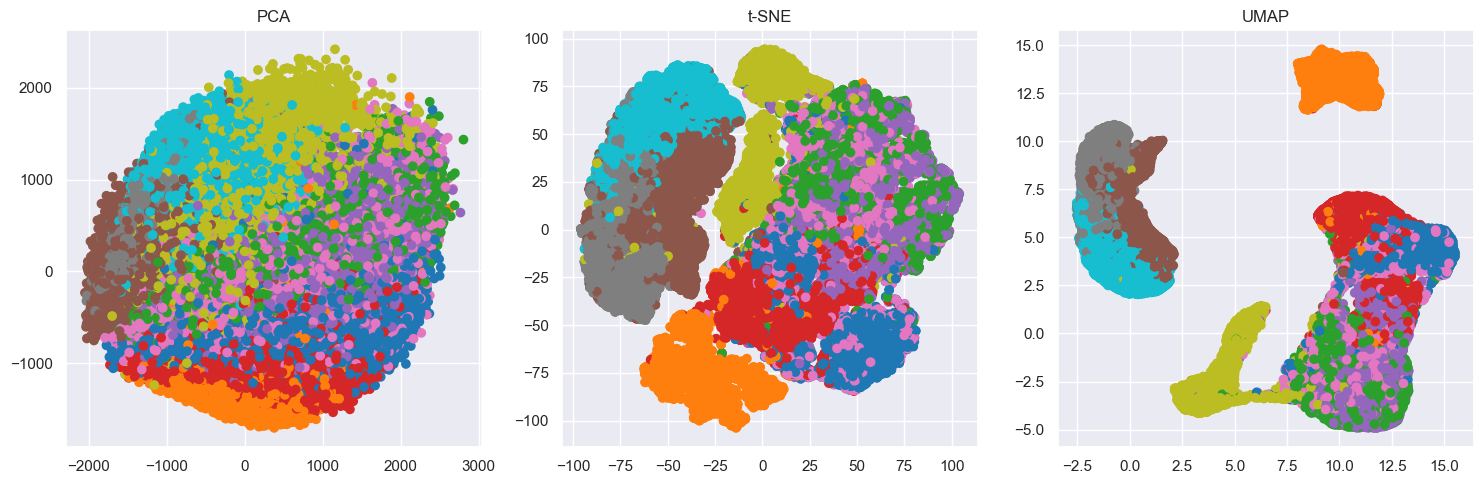

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=train_labels, cmap='tab10')
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=train_labels, cmap='tab10')
plt.title('t-SNE')

plt.subplot(1, 3, 3)
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=train_labels, cmap='tab10')
plt.title('UMAP')

plt.tight_layout()
plt.show()

## Аналіз продуктивності

In [42]:
algorithms = [pca,tsne,umap]
algorithm_names = ['PCA', 't-SNE', 'UMAP']

In [43]:
# Визначення розмірів підвибірок датасету
dataset_sizes = [100, 200, 400, 800, 1600]

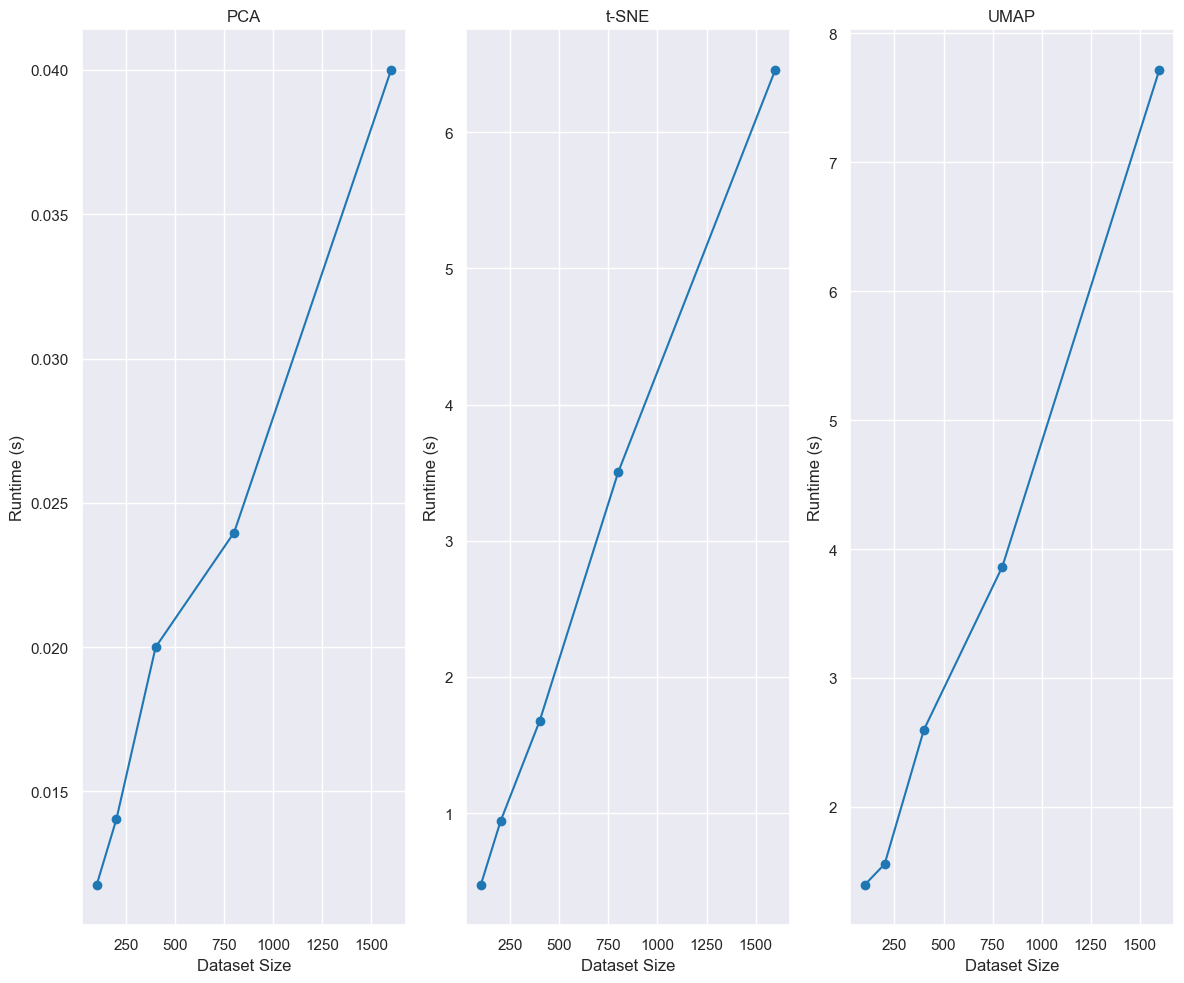

In [45]:
# Цикл по алгоритмам
for i, (algorithm, name) in enumerate(zip(algorithms, algorithm_names), 1):
    runtimes = []
    for size in dataset_sizes:
        start_time = time.time()
        _ = algorithm.fit_transform(train_features_flat[:size])
        elapsed_time = time.time() - start_time
        runtimes.append(elapsed_time)
    
    # Побудова графіку
    plt.subplot(1, 3, i)
    plt.plot(dataset_sizes, runtimes, marker='o')
    plt.title(name)
    plt.xlabel('Dataset Size')
    plt.ylabel('Runtime (s)')
    plt.grid(True)

plt.tight_layout()
plt.show()

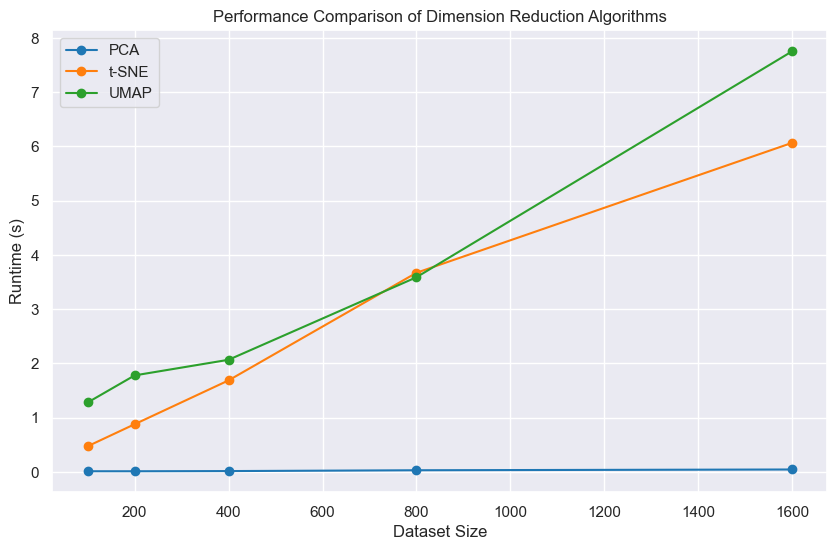

In [44]:
# Вимірювання часу виконання для кожного алгоритму та розміру датасету
performance_data = {name: [] for name in algorithm_names}
for size in dataset_sizes:
    for algorithm, name in zip(algorithms, algorithm_names):
        start_time = time.time()
        _ = algorithm.fit_transform(train_features_flat[:size])
        elapsed_time = time.time() - start_time
        performance_data[name].append(elapsed_time)

# Побудова графіку
plt.figure(figsize=(10, 6))
for name, runtimes in performance_data.items():
    plt.plot(dataset_sizes, runtimes, marker='o', label=name)

plt.title('Performance Comparison of Dimension Reduction Algorithms')
plt.xlabel('Dataset Size')
plt.ylabel('Runtime (s)')
plt.legend()
plt.grid(True)
plt.show()